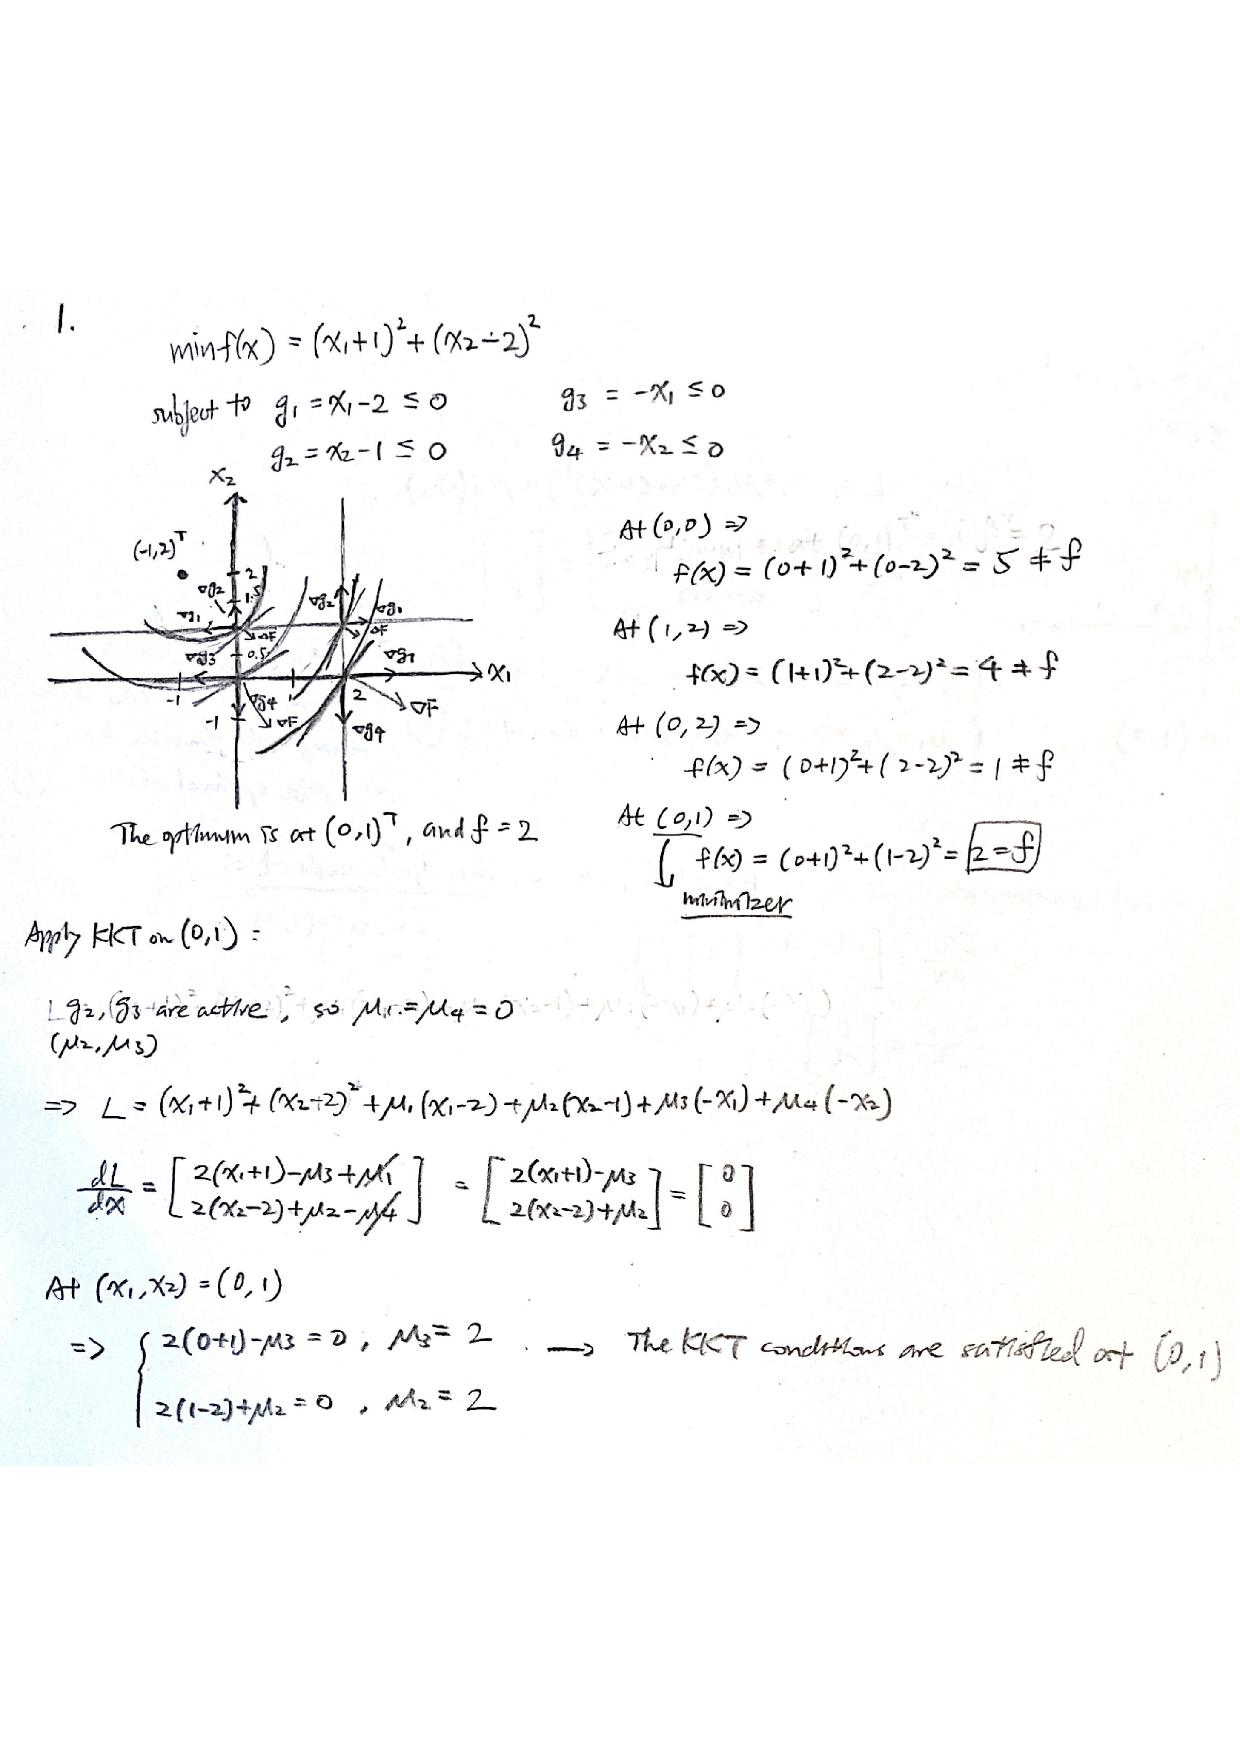

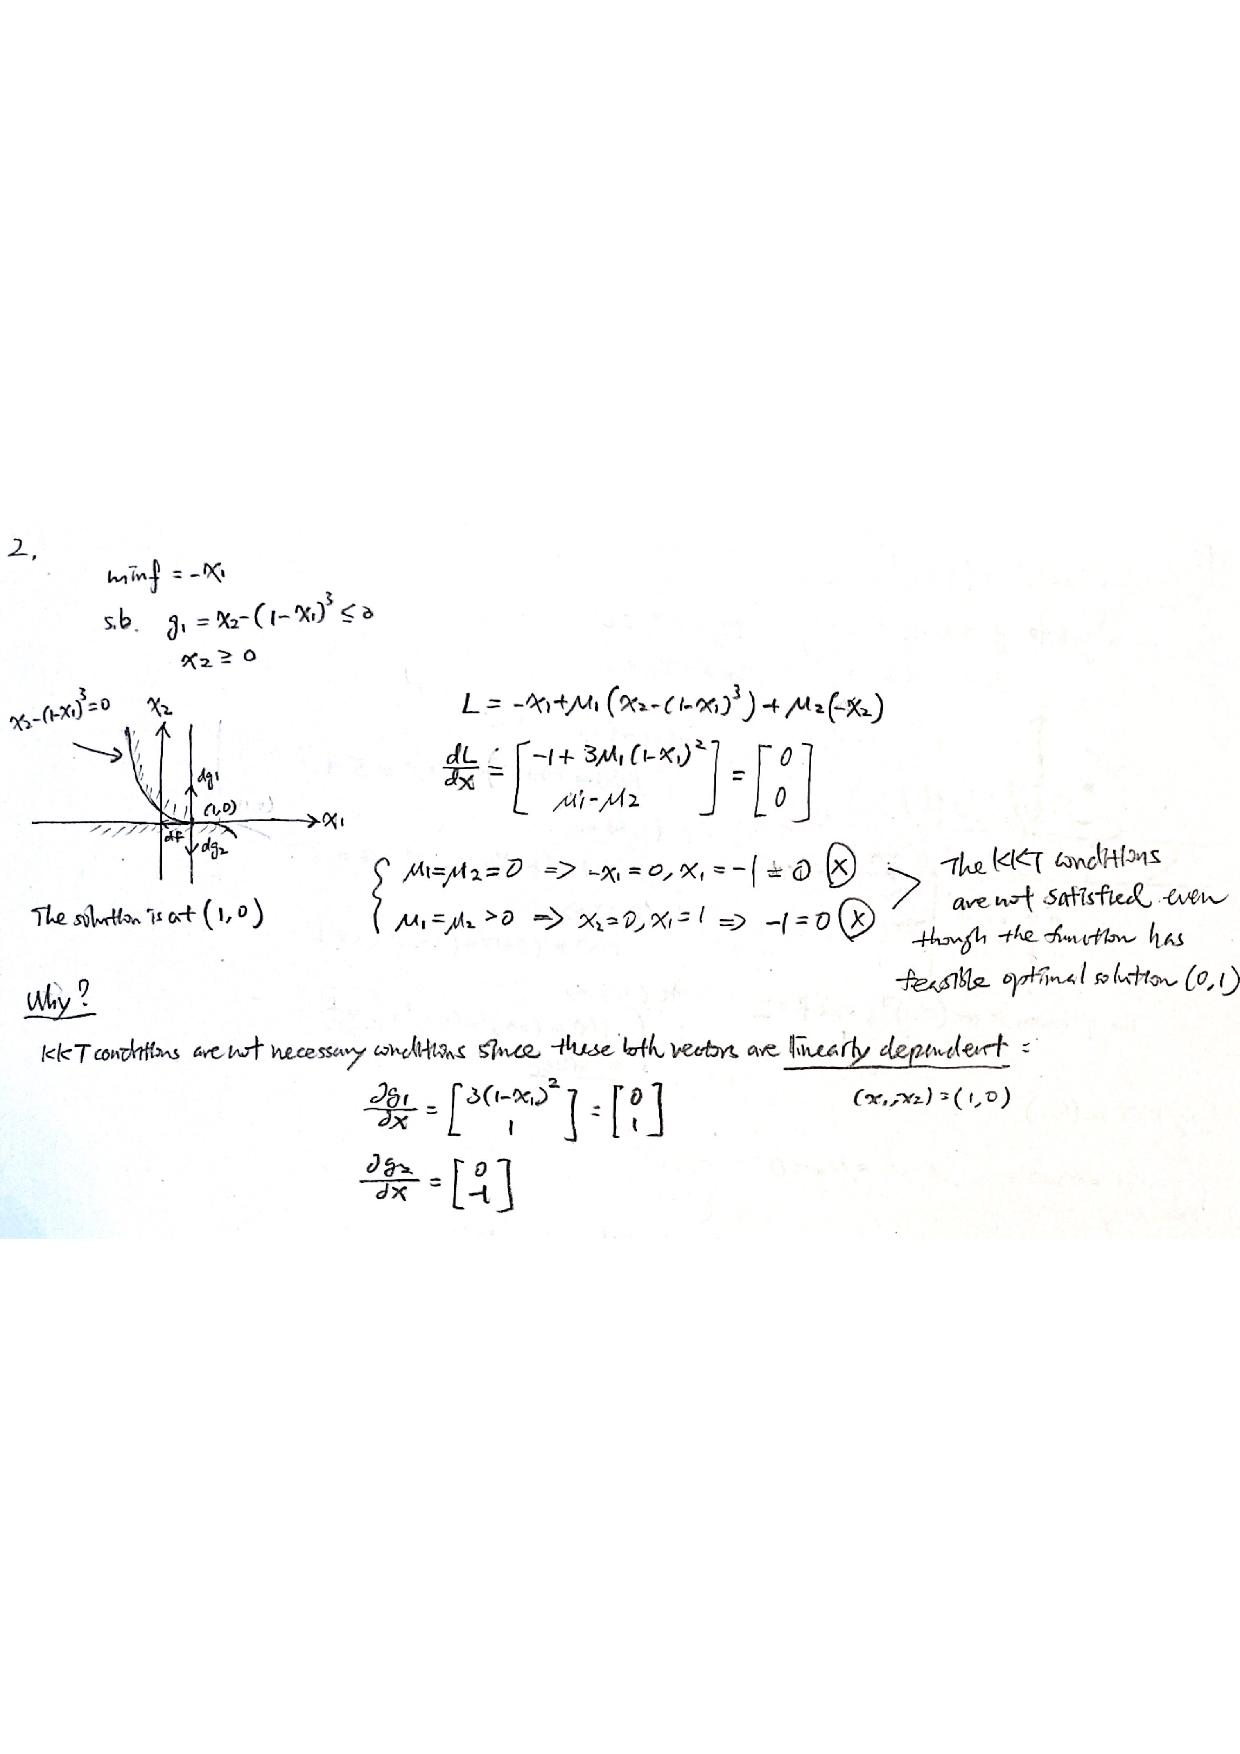

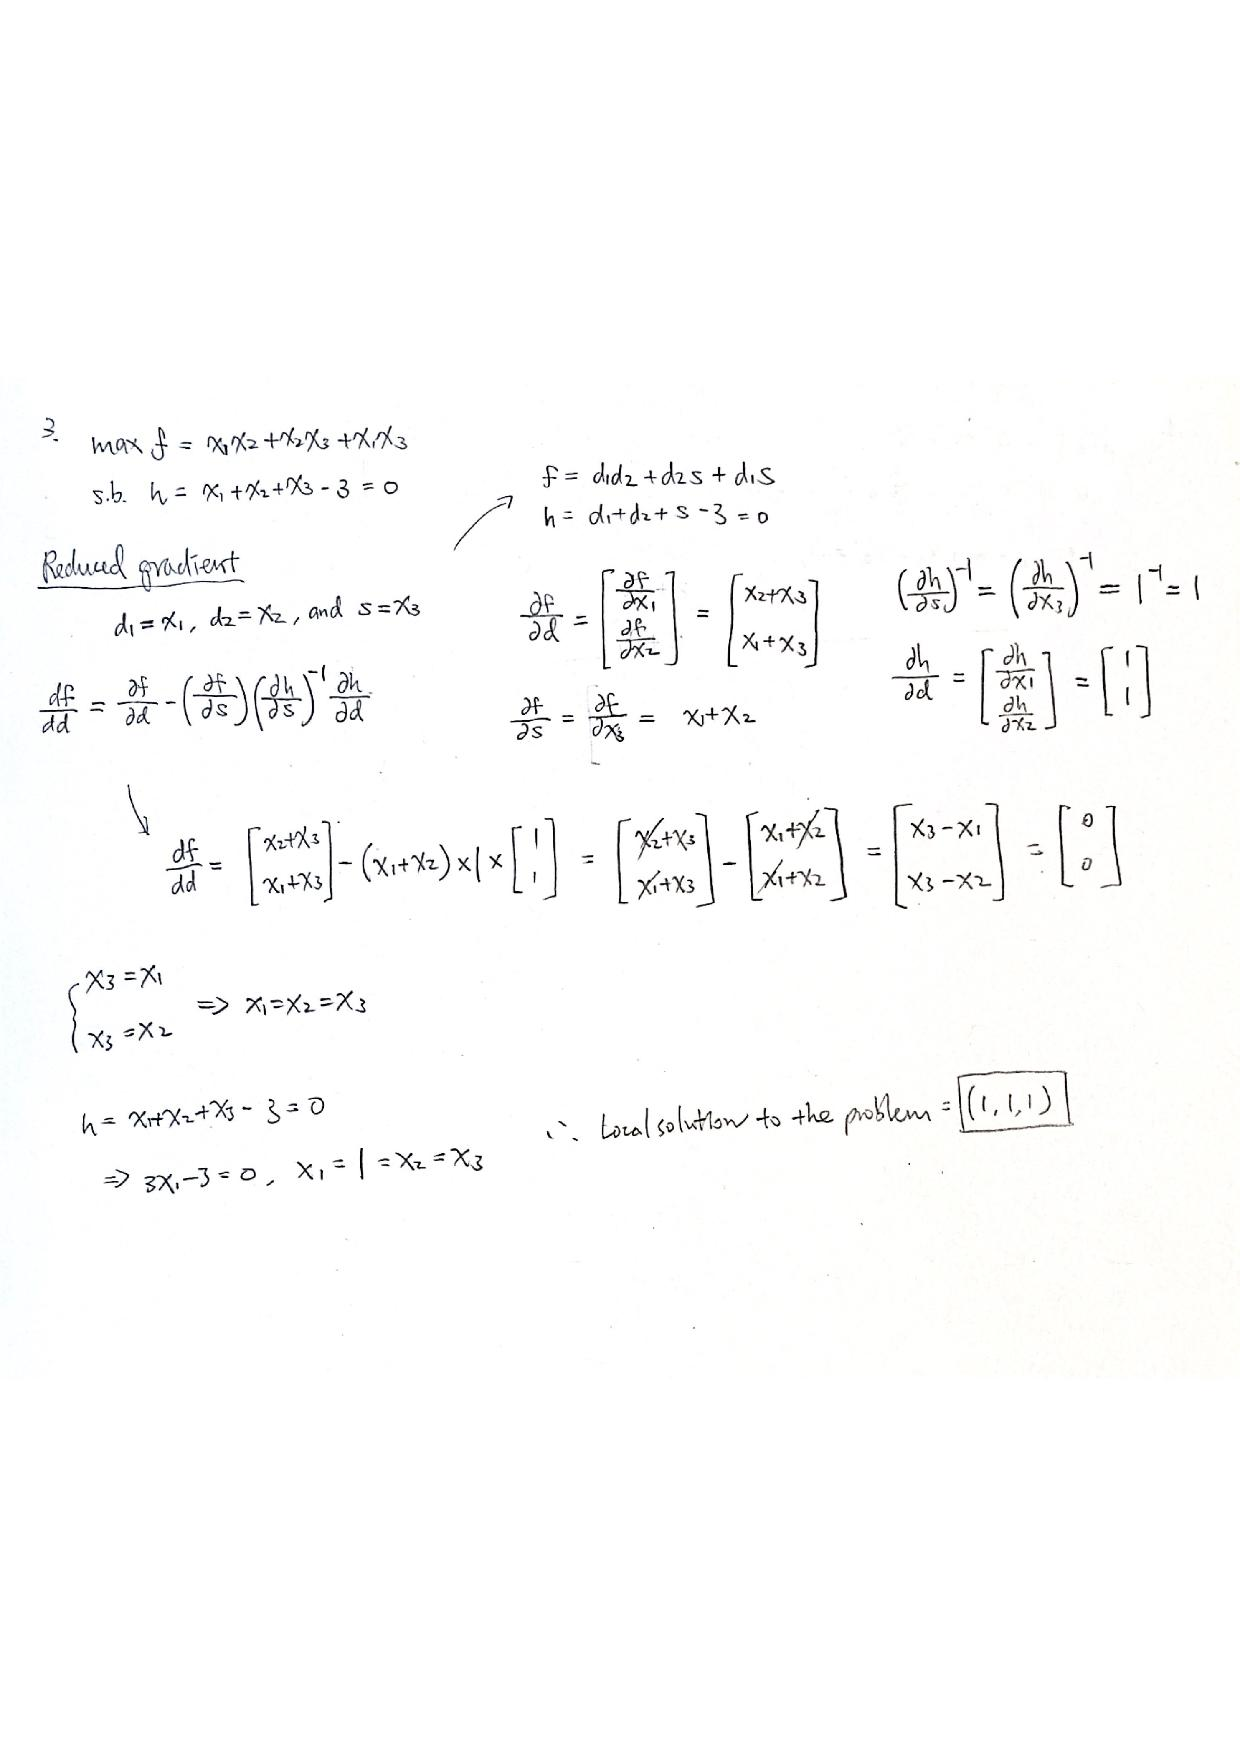

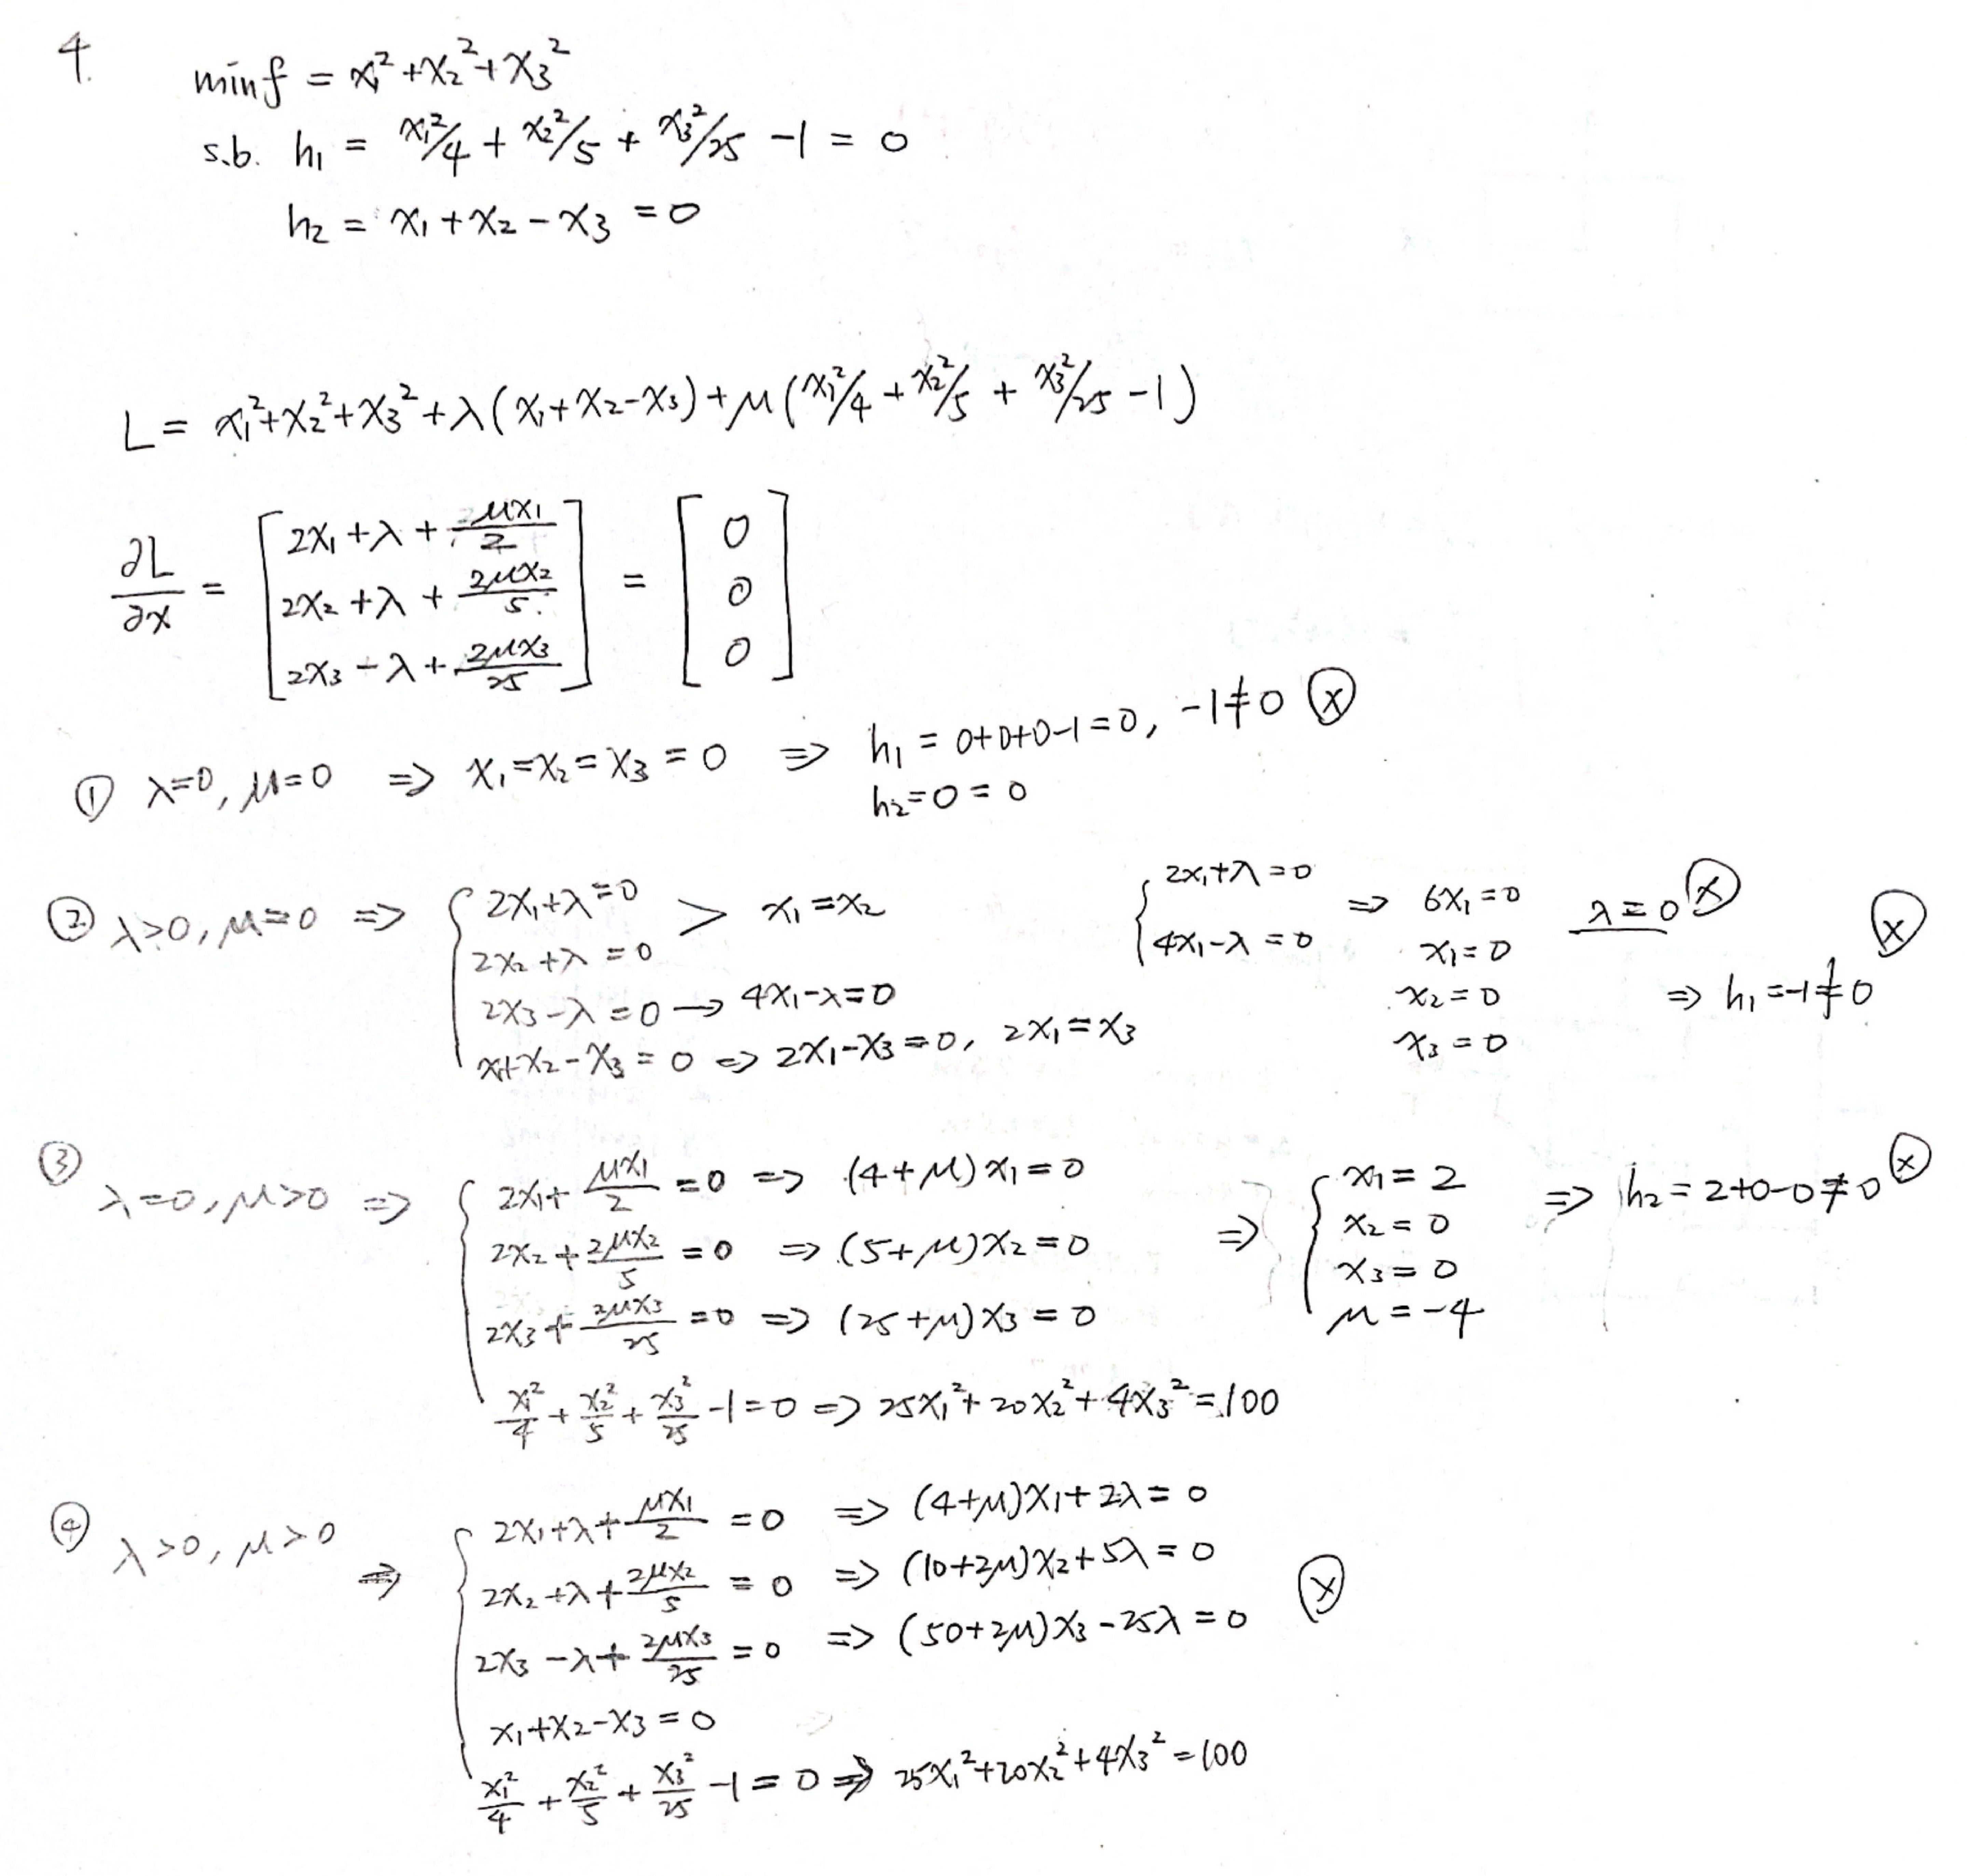

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt


# Initialize x0 = [s0,d0]
k = 0
e = .001

# Reduced gradient

def fun(x):
    return x[0]**2+x[1]**2+x[2]**2

def fd(x):
    return 2*x[0] 

def fs(x):
    return np.array([2*x[1], 2*x[2]])

def hs(x):
    return np.array([[2*x[1]/5, 2*x[2]/25],[1, -1]])

def hd(x):
    return np.array([[x[0]/2],[1]])

def dfdd(x):
    return fd(x) - np.matmul(np.matmul(fs(x), np.linalg.inv(hs(x))), hd(x))

# Initial gradient, linesearch and direction of gradient

def grad(x,dfdd,a):
    d0 = (x[0]-a*dfdd)[0]
    s0 = x[1:3] + a* np.transpose(np.matmul((np.matmul(fs(x), np.linalg.inv(hs(x))), hd(x)), np.transpose([dfdd(x)])))[0]
    return np.append(d0,s0)

# Armijo line search
def line_search(x, dfdd):
    a = 1
    b = 0.1
    t = 0.3
    while fun(grad(x,dfdd,a))>(fun(x)-(a*t*dfdd**2)):  # while phi(a,x)phi(a) then backtrack. d is the search direction
        a = b*a
    return a

# Newton's Ralphson algorithm
def s(x):  
    while np.linalg.norm(np.array([[x[0]**2/4 + x[1]**2/5 + x[2]**2/25 -1], [x[0]+x[1]-x[2]]]))> e:
        hs = hs(x)
        sk_j1= np.transpose(np.transpose([x[1:3]]) - np.matmul(np.linalg.inv(hs), np.array([[x[0]**2/4 + x[1]**2/5 + x[2]**2/25 -1], [x[0]+x[1]-x[2]]])))
        x = np.append(x[0:1], np.transpose(sk_j1[0]))
    return x

# Error 
x1 = 0
x2 = 1 /12*((600-170*(x1**2))**(1/2) +10*x1)
x3 = x2-x1

x0 = np.array([x1, x2, x3])

x_upd = [x0]
error = []

while np.linalg.norm(dfdd(x_upd[-1])) > e:
    x = x_upd[-1]
    dfdd = dfdd(x)
    error.append(math.log(np.linalg.norm(dfdd))) 
    a = line_search(x, dfdd)
    dk= x[0]- a*dfdd
    sk0= x[1:3] + a* np.transpose(np.matmul(np.matmul(np.linalg.inv(hs(x)), hd(x)), np.transpose(dfdd)))
    xk0=np.append(dk,sk0) 
        
    x = s(xk0)
    x_upd.append(x)
    
print('Point at which Local solution occurs' +str(x_upd[-1]))

# Convergence Plot
plt.plot(error)
plt.title('Convergence Plot')
plt.xlabel('Number of iterations')
plt.ylabel('Error')

TypeError: 'numpy.ndarray' object is not callable

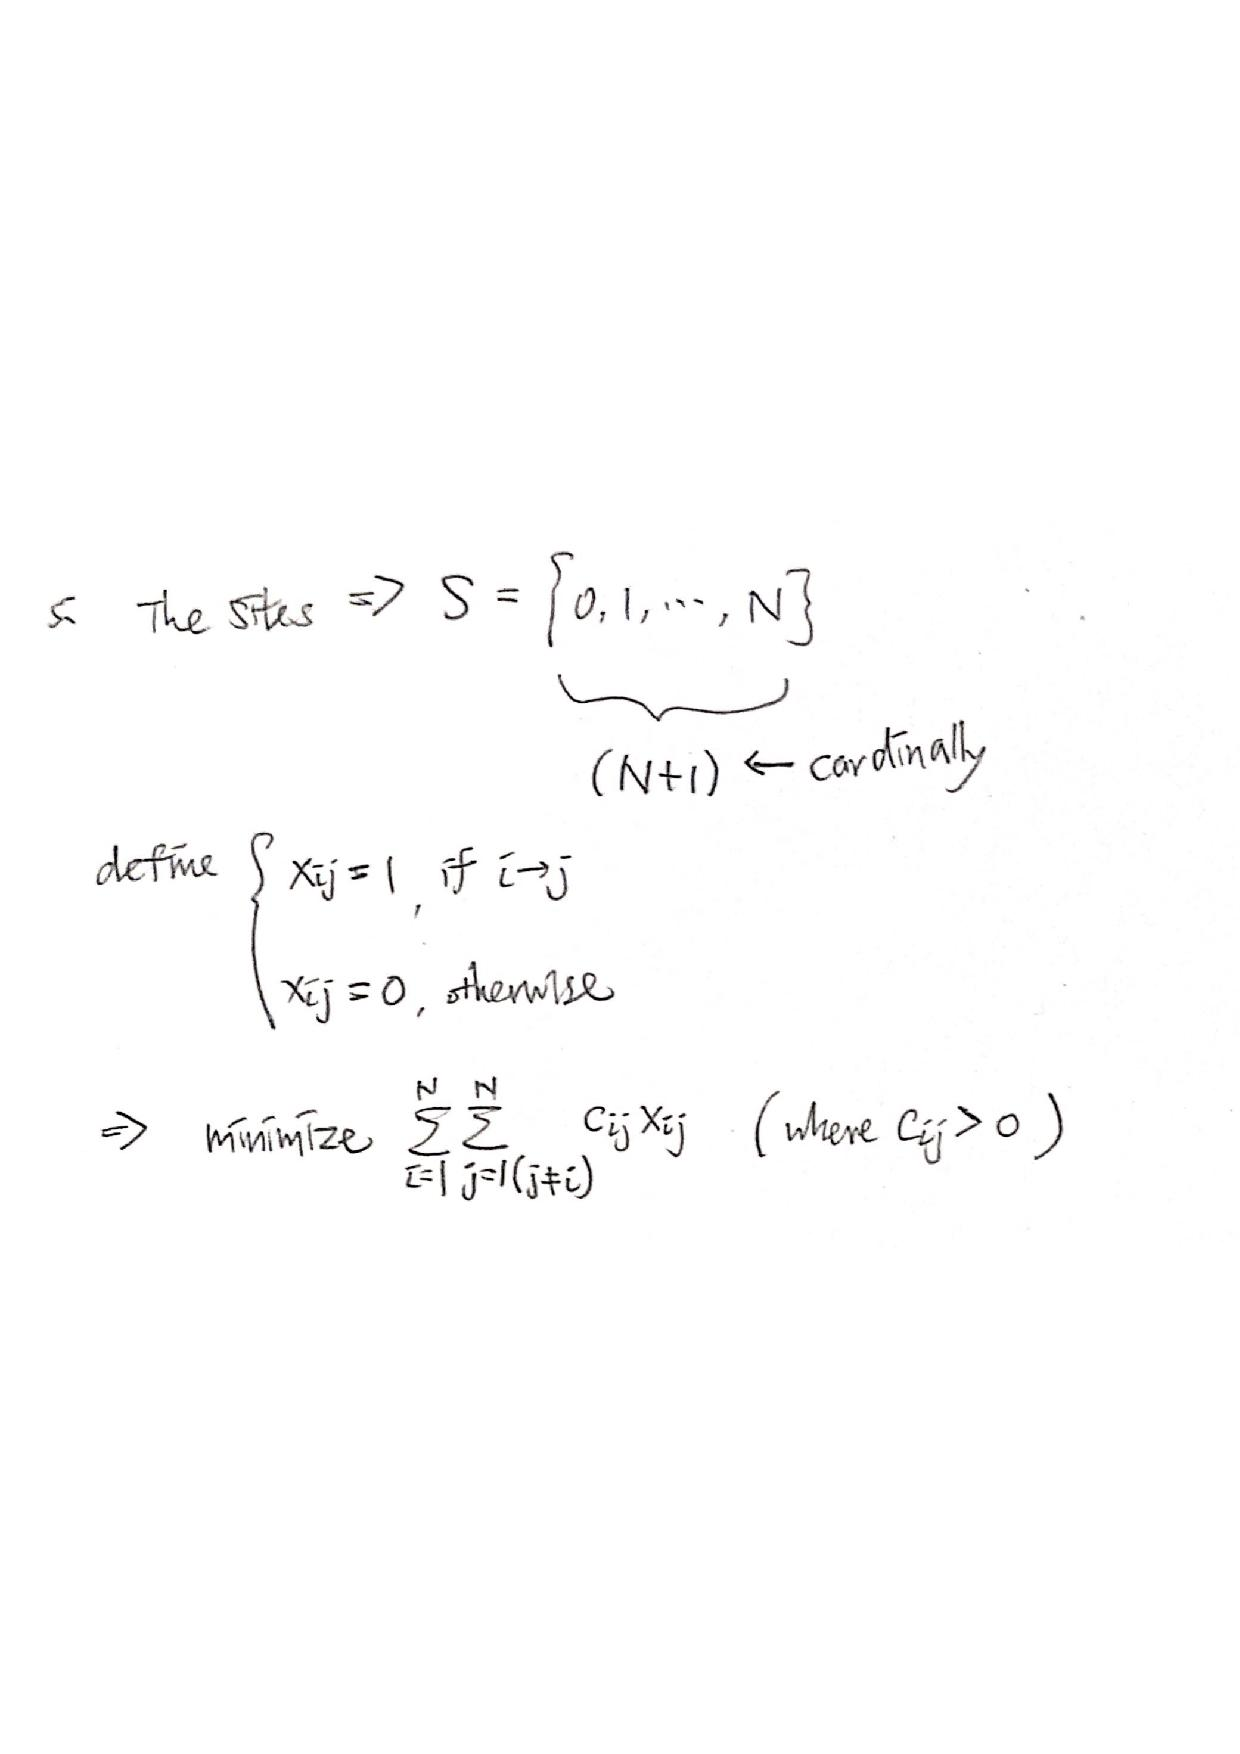